In [35]:
import numpy as np
import pandas as pd

In [36]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [37]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [38]:
df.shape

(42000, 785)

In [39]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
29368,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
import matplotlib.pyplot as plt

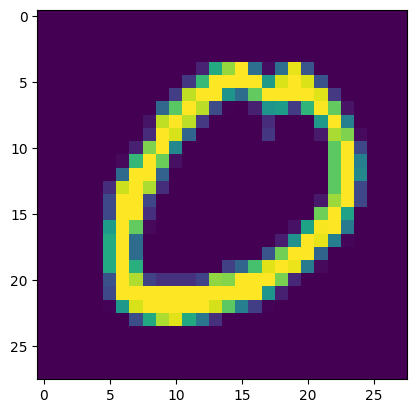

In [41]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [42]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [44]:
X_train.shape

(33600, 784)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn = KNeighborsClassifier()

In [47]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [48]:
import time 
start  = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

21.169408559799194


In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.9648809523809524

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [53]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [54]:
X_train_trf.shape
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn.predict(X_test_trf)
accuracy_score(y_test,y_pred)

0.9507142857142857

In [56]:
# for i in range(1,785):
#     pca = PCA(n_components=i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)
    
#     knn = KNeighborsClassifier()
    
#     knn.fit(X_train_trf,y_train)
    
#     y_pred = knn.predict(X_test_trf)
    
#     print(accuracy_score(y_test,y_pred))

In [57]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [58]:
X_train_trf

array([[-2.71859615, -0.49033232],
       [-0.67703773, -6.75297559],
       [-3.03311889,  6.50929034],
       ...,
       [ 2.14879401,  0.78102918],
       [ 1.05957293,  0.94724431],
       [17.70238608,  1.96274479]])

In [59]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [60]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [61]:
X_train_trf

array([[-2.71864202, -0.48975611,  1.13587448],
       [-0.67696293, -6.75338578, -2.33549323],
       [-3.03323711,  6.50971216,  7.49154632],
       ...,
       [ 2.14881869,  0.78095871, -0.74811056],
       [ 1.05955039,  0.94788304,  3.94979296],
       [17.70262465,  1.96211866, -4.94432105]])

In [62]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [64]:
pca.explained_variance_
#Eigen Values

array([40.67111198, 29.17023386, 26.74459558])

In [66]:
pca.components_.shape
#Eigen Vectors

(3, 784)

In [67]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [68]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [69]:
pca.explained_variance_.shape

(784,)

In [70]:
pca.components_.shape

(784, 784)

In [71]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

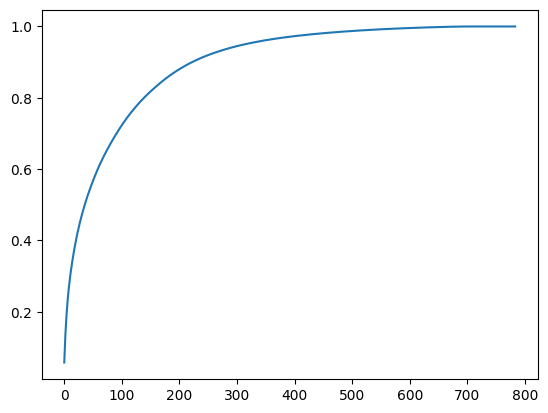

In [72]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))